# Forest cover type prediction -3rd Attempt

<a href='https://www.kaggle.com/c/forest-cover-type-prediction'>Kaggle Competition link</a>

## Data Interpretation

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

- 1 - Spruce/Fir
- 2 - Lodgepole Pine
- 3 - Ponderosa Pine
- 4 - Cottonwood/Willow
- 5 - Aspen
- 6 - Douglas-fir
- 7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

- 1 - Rawah Wilderness Area
- 2 - Neota Wilderness Area
- 3 - Comanche Peak Wilderness Area
- 4 - Cache la Poudre Wilderness Area

The soil types are:

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

# Data Handling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display 

In [2]:
data_path = '../data/forest_cover_type/train.csv'
test_path = '../data/forest_cover_type/test.csv'

train_data=pd.read_csv(data_path)
test_data=pd.read_csv(test_path)

pd.options.display.max_columns=None
target='Cover_Type'

In [3]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
train_data.set_index(['Id'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [5]:
test_data.set_index(['Id'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581008,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
concat_data = pd.concat([train_data, test_data])

In [7]:
concat_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0


## Valiating concatination

In [13]:
assert(concat_data[target].isnull().sum() == len(test_data))
assert(concat_data[target].notnull().sum() == len(train_data))

## Checking for missing values

In [113]:
columns = concat_data.columns
columns=columns.drop([target])
columns=columns.drop(['Id'])

In [61]:
concat_data[columns].isnull().mean()

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

## Data interpretaation

We have 40 soil types and 4 wilderness area.

`Wilderness_Area#` is a one hot encoded collection of columns.

we cant say the same for `Soil_Type#` columns.

In [44]:
# Lets see if soil type column is also a one hot encoding or not
num_rows=50
(concat_data.iloc[:num_rows,-41:-1].notnull().sum() > num_rows).sum()

0

We can thus infer from the previous output that at least for `num_rows` rows the `Soil_Type#` columns are one-hot encoded

## Graphs

In [62]:
other_columns = [col for col in columns if not col.startswith('Soil')] #[1:] removes the id column
print(len(other_columns))

14


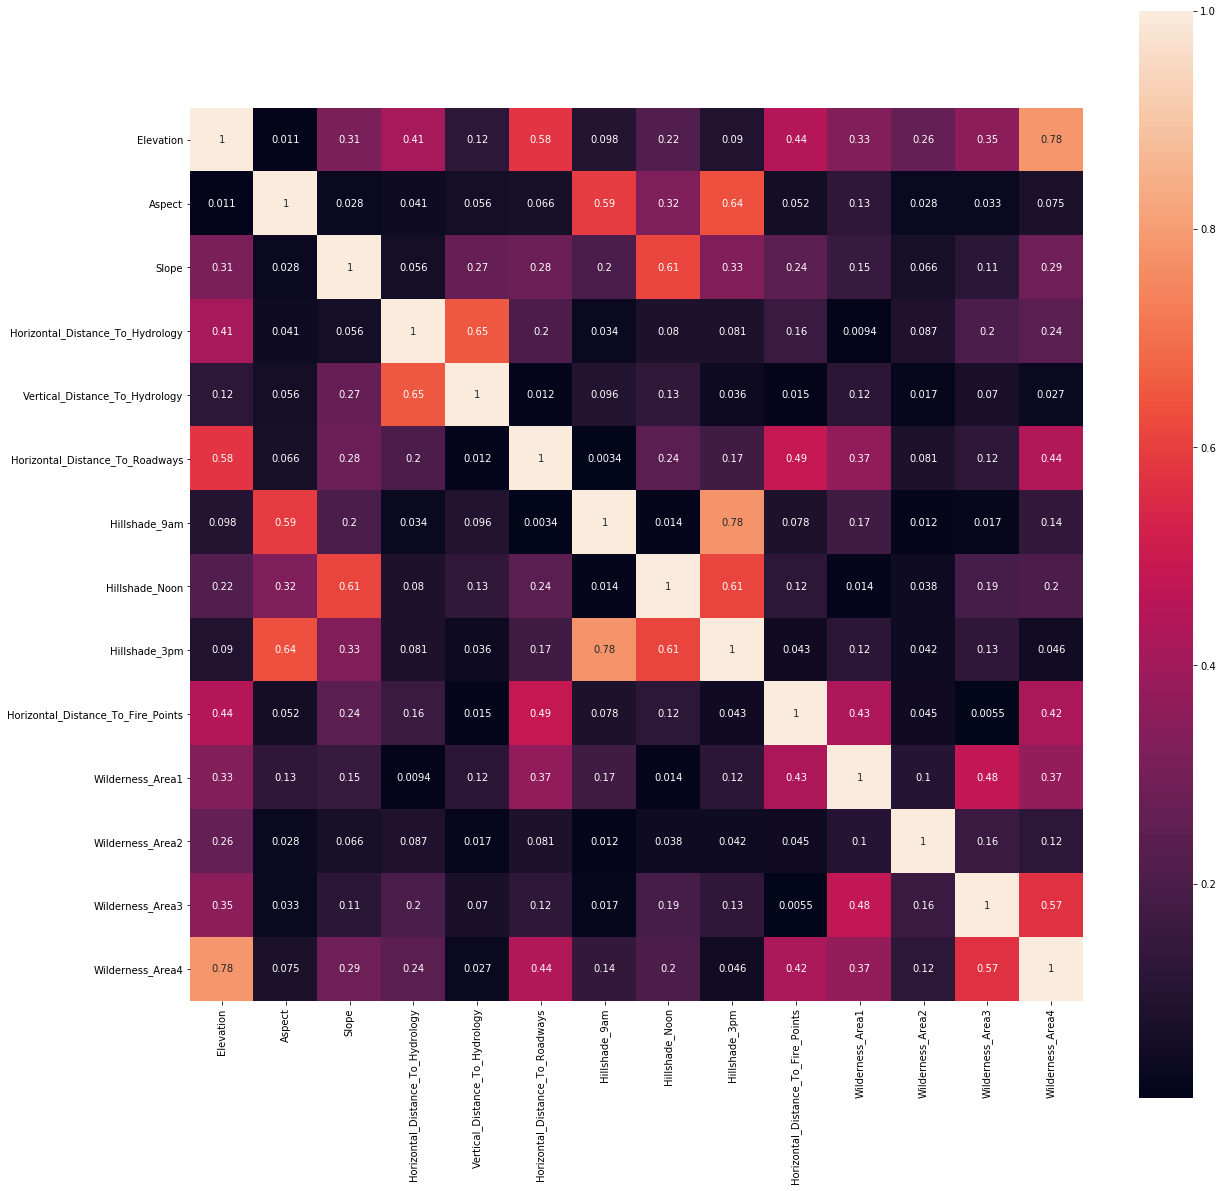

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(data=abs(train_data[other_columns].corr()), annot=True, square=True)

As we can see there are many columns which have high correlation with other columns. Sorting these so that we can find the correlation greater than 0.6

In [53]:
import numpy as np

In [54]:
abs_corr=abs(train_data[other_columns].corr())
mask=np.zeros_like(abs_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
masked_abs_corr=abs_corr.mask(mask).unstack()

In [55]:
masked_abs_corr.loc[masked_abs_corr>0.6].sort_values(ascending=False)

Elevation                         Wilderness_Area4                  0.783651
Hillshade_9am                     Hillshade_3pm                     0.779965
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.652142
Aspect                            Hillshade_3pm                     0.635022
Hillshade_Noon                    Hillshade_3pm                     0.614526
Slope                             Hillshade_Noon                    0.612613
dtype: float64

Here we can see that `Hillshade_3pm` has high correlation with `Hillshade_9am`, `Aspect`,`Hillshade_noon` and `Slope`
So we can drop the `Hillshade_noon` and `Hillshade_9am`.

We also see that `Vertical_Distance_To_Hydrology` has a high correlation with `Horizontal_Distance_To_Hydrology`. So we can also drop `Horizontal_Distance_To_Hydrology`.

Not removing `Wilderness_Area4` even though it has high correlation with `Elevation` because I dnt want to disturb the one-hot-encoding of `Wilderness_Area#`

Not removing `Aspect` and `Slope` as they might be of importance.

In [129]:
other_columns=[col for col in other_columns if col not in ['Horizontal_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon']]
display(other_columns)

['Elevation',
 'Aspect',
 'Slope',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

## Cols with less Variance

In [63]:
train_data[columns].var()

Elevation                             1.744551e+05
Aspect                                1.211888e+04
Slope                                 7.146888e+01
Horizontal_Distance_To_Hydrology      4.413163e+04
Vertical_Distance_To_Hydrology        3.750265e+03
Horizontal_Distance_To_Roadways       1.755801e+06
Hillshade_9am                         9.339923e+02
Hillshade_Noon                        5.199296e+02
Hillshade_3pm                         2.106368e+03
Horizontal_Distance_To_Fire_Points    1.209860e+06
Wilderness_Area1                      1.813139e-01
Wilderness_Area2                      3.191558e-02
Wilderness_Area3                      2.436013e-01
Wilderness_Area4                      2.136069e-01
Soil_Type1                            2.292910e-02
Soil_Type2                            3.950857e-02
Soil_Type3                            5.958022e-02
Soil_Type4                            5.264895e-02
Soil_Type5                            1.079433e-02
Soil_Type6                     

In [118]:
zero_var_cols=columns[train_data[columns].var() == 0]
display(zero_var_cols)

Index(['Soil_Type7', 'Soil_Type15'], dtype='object')

Dropping `Soil_Type7` and `Soil_Type15` as it has no variance

In [119]:
soil_columns=['Soil_Type'+str(i) for i in range(1,41)]
display(soil_columns)

['Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [125]:
soil_columns = [col for col in soil_columns if col not in zero_var_cols.values]
display(soil_columns)

['Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [130]:
edited_columns = other_columns+soil_columns
display(edited_columns)

['Elevation',
 'Aspect',
 'Slope',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

## Getting right subset of columns

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(train_data[edited_columns], train_data[target], test_size=0.3)

In [132]:
print(X_train.shape)
print(y_train.shape)

(10584, 49)
(10584,)


In [133]:
print(X_test.shape)
print(y_test.shape)

(4536, 49)
(4536,)


In [134]:
feat_sel = SelectFromModel(RandomForestClassifier(n_estimators=50))
feat_sel.fit(X_train.values, y_train.values)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50, n_jobs=None,
                                                 oob_score=False,


In [142]:
display(len(feat_sel.get_support()))
display(len(edited_columns))
display(feat_sel.get_support())

49

49

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [148]:
selected_columns=pd.Series(edited_columns)[pd.Series(feat_sel.estimator_.feature_importances_.ravel()) > 0.01]
selected_columns_support=pd.Series(edited_columns)[feat_sel.get_support()]

In [147]:
display(selected_columns)

0                              Elevation
1                                 Aspect
2                                  Slope
3         Vertical_Distance_To_Hydrology
4        Horizontal_Distance_To_Roadways
5                          Hillshade_3pm
6     Horizontal_Distance_To_Fire_Points
7                       Wilderness_Area1
9                       Wilderness_Area3
10                      Wilderness_Area4
13                            Soil_Type3
14                            Soil_Type4
19                           Soil_Type10
46                           Soil_Type38
47                           Soil_Type39
48                           Soil_Type40
dtype: object

In [149]:
display(selected_columns_support)

0                              Elevation
1                                 Aspect
2                                  Slope
3         Vertical_Distance_To_Hydrology
4        Horizontal_Distance_To_Roadways
5                          Hillshade_3pm
6     Horizontal_Distance_To_Fire_Points
7                       Wilderness_Area1
10                      Wilderness_Area4
19                           Soil_Type10
dtype: object

In [168]:
X_train[selected_columns_support].head()

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area4,Soil_Type10
9002,2937,78,10,17,1756,120,1530,0,0,0
1708,2719,64,24,70,134,70,1984,1,0,0
6659,2850,194,25,152,778,163,1776,0,0,0
6234,2938,72,32,-8,430,32,1678,1,0,0
4419,2154,323,36,99,532,196,789,0,1,1


# Model Creation

## Logistic Regression

In [156]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
one_hot_encoder=OneHotEncoder(sparse=False)
encoded_target=one_hot_encoder.fit_transform(y_train.values.reshape(-1,1))
display(encoded_target)
display(encoded_target.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

(10584, 7)

In [155]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [169]:
n_feat=len(selected_columns_support)
display(n_feat)

10

In [170]:
target_columns=encoded_target.shape[1]
display(target_columns)

7

In [171]:
model_v1=Sequential()
model_v1.add(Dense(target_columns, input_dim=n_feat, activation='softmax'))

In [172]:
model_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [173]:
model_v1.fit(X_train[selected_columns_support].values, encoded_target, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000
331/331 [==============================] - 1s 2ms/step - loss: 680.1268 - accuracy: 0.1215
Epoch 2/1000
331/331 [==============================] - 1s 2ms/step - loss: 152.0013 - accuracy: 0.1726
Epoch 3/1000
331/331 [==============================] - 1s 2ms/step - loss: 33.9132 - accuracy: 0.2353
Epoch 4/1000
331/331 [==============================] - 1s 2ms/step - loss: 10.2415 - accuracy: 0.2570
Epoch 5/1000
331/331 [==============================] - 1s 2ms/step - loss: 4.4956 - accuracy: 0.2922
Epoch 6/1000
331/331 [==============================] - 1s 2ms/step - loss: 3.2646 - accuracy: 0.3206
Epoch 7/1000
331/331 [==============================] - 1s 2ms/step - loss: 2.8677 - accuracy: 0.3443
Epoch 8/1000
331/331 [==============================] - 1s 2ms/step - loss: 2.5724 - accuracy: 0.3532
Epoch 9/1000
331/331 [==============================] - 1s 2ms/step - loss: 2.3548 - accuracy: 0.3737
Epoch 10/1000
331/331 [==============================] - 1s 2ms/step - loss:

## Neural Network

In [182]:
model_v2=Sequential()
model_v2.add(Dense(10, input_dim=n_feat, activation='relu', kernel_initializer='he_normal'))
model_v2.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_v2.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_v2.add(Dense(target_columns, activation='softmax', kernel_initializer='he_normal'))

In [183]:
model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
model_v2.fit(X_train[selected_columns_support].values, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000


ValueError: in user code:

    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:541 train_step  **
        self.trainable_variables)
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1804 _minimize
        trainable_variables))
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:521 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    /home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:1219 _filter_grads
        ([v.name for _, v in grads_and_vars],))

    ValueError: No gradients provided for any variable: ['dense_7/kernel:0', 'dense_7/bias:0', 'dense_8/kernel:0', 'dense_8/bias:0', 'dense_9/kernel:0', 'dense_9/bias:0', 'dense_10/kernel:0', 'dense_10/bias:0'].


## Random Forest Classifier

In [185]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')

In [186]:
random_forest_classifier.fit(X_train.values, y_train.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
random_forest_classifier.score(X_train.values, y_train.values)

0.9999055177626606

In [188]:
random_forest_classifier.score(X_test.values, y_test.values)

0.8602292768959435

In [206]:
prediction = random_forest_classifier.predict(test_data[edited_columns].values)

In [207]:
display(prediction)

array([2, 1, 2, ..., 3, 3, 3])

In [208]:
prediction.shape

(565892,)

In [209]:
test_data.shape

(565892, 55)

In [210]:
prediction

array([2, 1, 2, ..., 3, 3, 3])

In [214]:
prediction_df = pd.DataFrame(columns=['Id', 'Cover_Type'])

In [215]:
prediction_df.columns

Index(['Id', 'Cover_Type'], dtype='object')

In [222]:
prediction_df['Id']=test_data['Id']
prediction_df['Cover_Type']=prediction
prediction_df=prediction_df.set_index(['Id'])

In [223]:
display(prediction_df)

,Cover_Type
Id,
15121,2
15122,1
15123,2
15124,2
15125,2
...,...
581008,3
581009,3
581010,3


In [224]:
prediction_df.to_csv('../data/forest_cover_type/prediction_forest_classifier.csv')